In [21]:
from pymatgen.ext.matproj import MPRester
from pymatgen import Structure 
from pymatgen.analysis.diffraction.xrd import XRDCalculator
import matplotlib.pyplot as plt

In [22]:
with MPRester("nTQqrVPUX1GFrAOLnWc2") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-5967")
    structure.to(filename = "TiCoSb.cif")

Pour un réseau cubique à faces centrées (F), la condition de présence des pics est que les indices h, k et l soient de même parité.

$$ h + k = 2n $$
$$ h + l = 2o $$
$$ k + l = 2p $$ 

Pour calculer les angles auxquels surviennent ces pics, nous utilisons la loi de Bragg: 
$$ n \lambda = 2d \sin(\theta) $$ 

Pour un réseau cubique, l'espacement entre les plans cristallins $d$ est donnée par:
$$ d = \dfrac{a}{\sqrt(h^{2}+k^{2}+l^{2})} $$
où $a$ est le paramètre de maille. 

La présence des carrés dans la formule implique l'existence de multiplicité de différents plans. En effet, les plans (111) et (-111) auront la même distance par exemple. La multiplicité indique donc le nombre de plans qui ont la même distance entre eux.
De plus, par la formule de Bragg on voit que plusieurs plans peuvent être associés à un même pic du diffractogramme. 

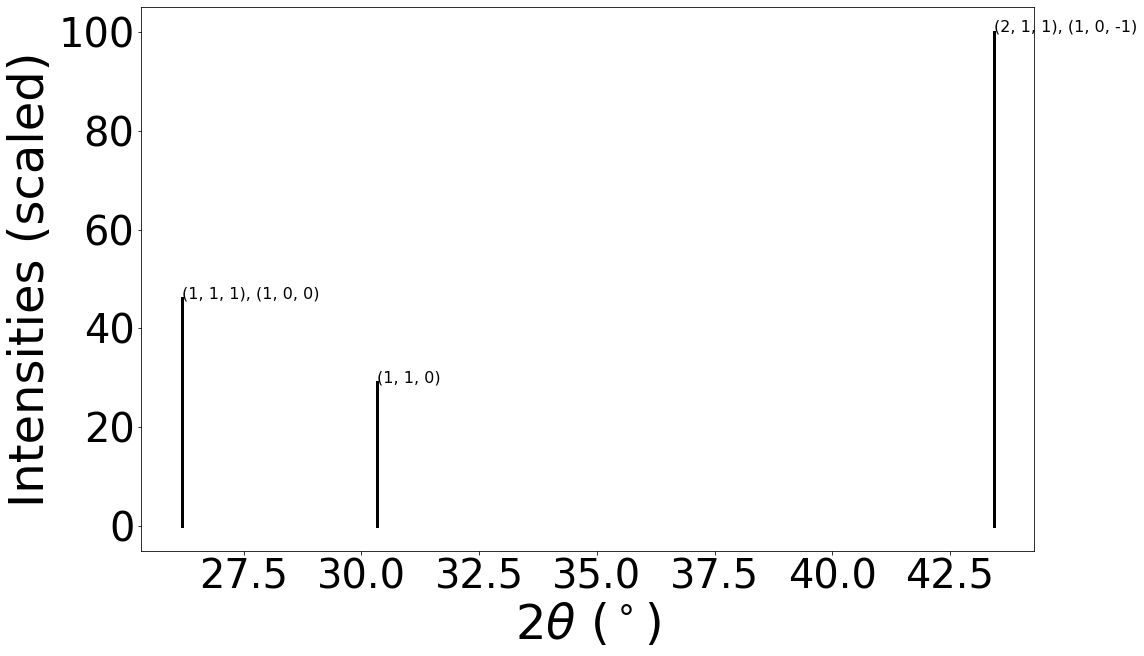

Pic  1 : 
2θ =  26.18980955467847
Intensité =  46.12290346622838
Indices hkl et multiplicité =  [{'hkl': (1, 1, 1), 'multiplicity': 2}, {'hkl': (1, 0, 0), 'multiplicity': 6}]
Distance associée : 3.4026484524852103


Pic  2 : 
2θ =  30.33174973659995
Intensité =  29.093782680526008
Indices hkl et multiplicité =  [{'hkl': (1, 1, 0), 'multiplicity': 6}]
Distance associée : 2.94678


Pic  3 : 
2θ =  43.42859418030339
Intensité =  100.0
Indices hkl et multiplicité =  [{'hkl': (2, 1, 1), 'multiplicity': 6}, {'hkl': (1, 0, -1), 'multiplicity': 6}]
Distance associée : 2.0836881206648945




In [44]:
#Détermination des 3 premiers pics du diffractogramme

#Initialisation du calculateur de diffraction
xrd = XRDCalculator('CuKa')

#Calcul du diffractogramme
pattern = xrd.get_pattern(structure, scaled=True)
xrd.show_plot(structure,annotate_peaks=True,two_theta_range=[0,45])

#Affichage des trois premiers pics
for i in range(3):
    print("Pic ", i+1, ": ") 
    print("2\u03B8 = ", pattern.x[i])
    print("Intensité = ", pattern.y[i])
    print("Indices hkl et multiplicité = ", pattern.hkls[i])
    print("Distance associée :", pattern.d_hkls[i])
    print("\n")